11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8655 - loss: 0.4773 - val_accuracy: 0.9581 - val_loss: 0.1484
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9606 - loss: 0.1368 - val_accuracy: 0.9645 - val_loss: 0.1183
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9724 - loss: 0.0911 - val_accuracy: 0.9696 - val_loss: 0.1005
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9797 - loss: 0.0676 - val_accuracy: 0.9746 - val_loss: 0.0857
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9846 - loss: 0.0507 - val_accuracy: 0.9720 - val_loss: 0.0951
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9889 - loss: 0.0377 - val_accuracy: 0.9743 - val_loss: 0.0843
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8456 - loss: 0.5278 - val_accuracy: 0.9548 - val_loss: 0.1562
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9498 - loss: 0.1667 - val_accurac

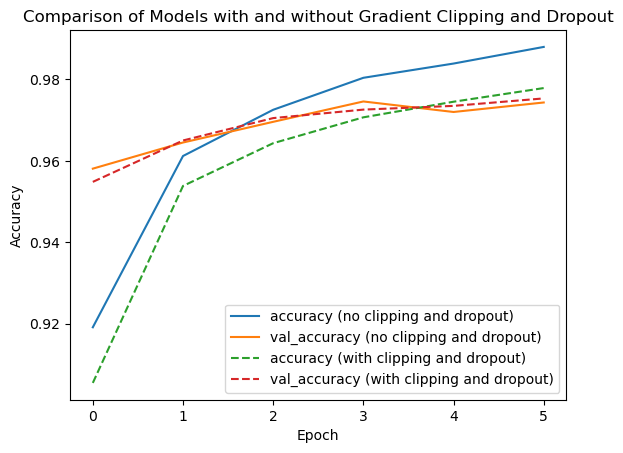

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from keras import callbacks

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

earlystopping = callbacks.EarlyStopping(monitor="val_accuracy",
                                        mode="min",
                                        patience=5,
                                        restore_best_weights=True)

model_without_clipping = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_without_clipping.compile(optimizer='adam',
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

history_without_clipping = model_without_clipping.fit(x_train, y_train, epochs=10, validation_split=0.2,callbacks=[earlystopping])

model_with_clipping = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(clipnorm=0.5)
model_with_clipping.compile(optimizer=optimizer,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

history_with_clipping = model_with_clipping.fit(x_train, y_train, epochs=10, validation_split=0.2,callbacks=[earlystopping])

plt.plot(history_without_clipping.history['accuracy'], label='accuracy (no clipping and dropout)')
plt.plot(history_without_clipping.history['val_accuracy'], label='val_accuracy (no clipping and dropout)')
plt.plot(history_with_clipping.history['accuracy'], linestyle='--', label='accuracy (with clipping and dropout)')
plt.plot(history_with_clipping.history['val_accuracy'], linestyle='--', label='val_accuracy (with clipping and dropout)')
plt.title('Comparison of Models with and without Gradient Clipping and Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
